# Product Inventory Analysis with Python

## Project Overview
This project demonstrates a comprehensive analysis of product inventory data using Python and popular data analysis libraries. Through this analysis, we explore various aspects of product management, pricing strategies, and inventory optimization.

## Technologies Used
- Python
- Pandas for data manipulation
- Matplotlib and Seaborn for visualization
- Jupyter Notebook as development environment

## Data Analysis Process

### 1. Initial Data Setup and Exploration
First, I'll explore the dataset to understand its structure and contents:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset
df = pd.read_csv('products.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

print("\nFirst few records:")
print(df.head())

print("\nBasic statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product ID    50 non-null     int64 
 1   Product Name  50 non-null     object
 2   Price         50 non-null     int64 
 3   Category      50 non-null     object
 4   Stock         50 non-null     int64 
 5   Supplier      50 non-null     object
dtypes: int64(3), object(3)
memory usage: 2.5+ KB
None

First few records:
   Product ID Product Name  Price     Category  Stock    Supplier
0         101   Tablet_101   1176  Electronics     71  Supplier C
1         102    Chair_102    910    Furniture      9  Supplier A
2         103     Desk_103   1344    Furniture     88  Supplier A
3         104     Sofa_104   1180    Furniture      1  Supplier B
4         105   Laptop_105   1145  Electronics      8  Supplier A

Basic statistics:
       Product ID       Price      Stock
count    50.00000

### 2. Exploratory Data Analysis
Let's analyze the distribution of products, prices, and inventory levels across different categories:

Category Statistics:
              Price                  Stock
               mean  min   max count   sum
Category                                  
Electronics  663.06   70  1347    17   715
Furniture    917.87   71  1487    23  1052
Stationery   850.00  326  1446    10   537


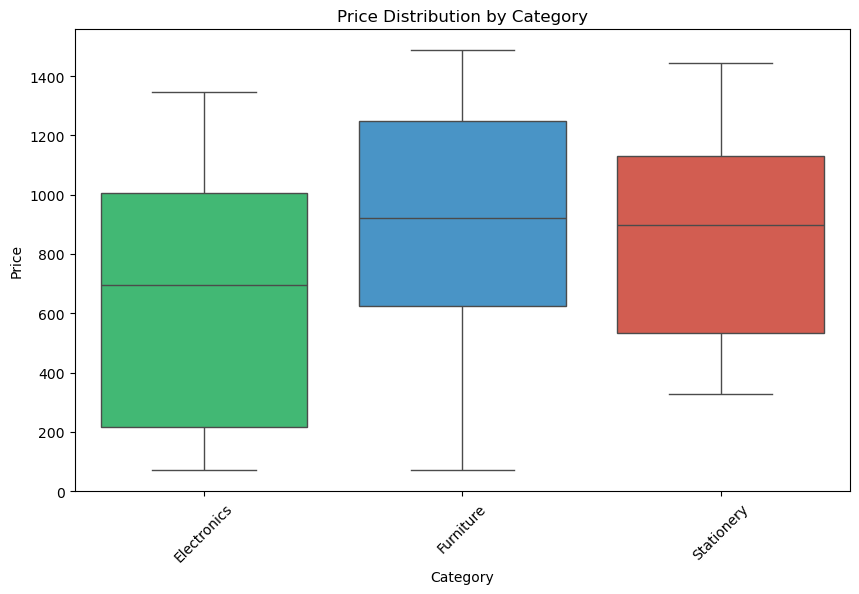


Number of products by category:
Category
Furniture      23
Electronics    17
Stationery     10
Name: count, dtype: int64


In [7]:
# Analyze price distribution by category
category_stats = df.groupby('Category').agg({
    'Price': ['mean', 'min', 'max', 'count'],
    'Stock': 'sum'
}).round(2)

print("Category Statistics:")
print(category_stats)

# Visualize price distribution with custom colors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=df, 
            hue='Category', legend=False,
            palette=['#2ecc71', '#3498db', '#e74c3c'])  # Verde, Azul, Rojo
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

# Show product count by category
print("\nNumber of products by category:")
print(df['Category'].value_counts())

### 3. Price and Stock Analysis
Let's examine the relationship between pricing and stock levels, and identify high-value inventory items:

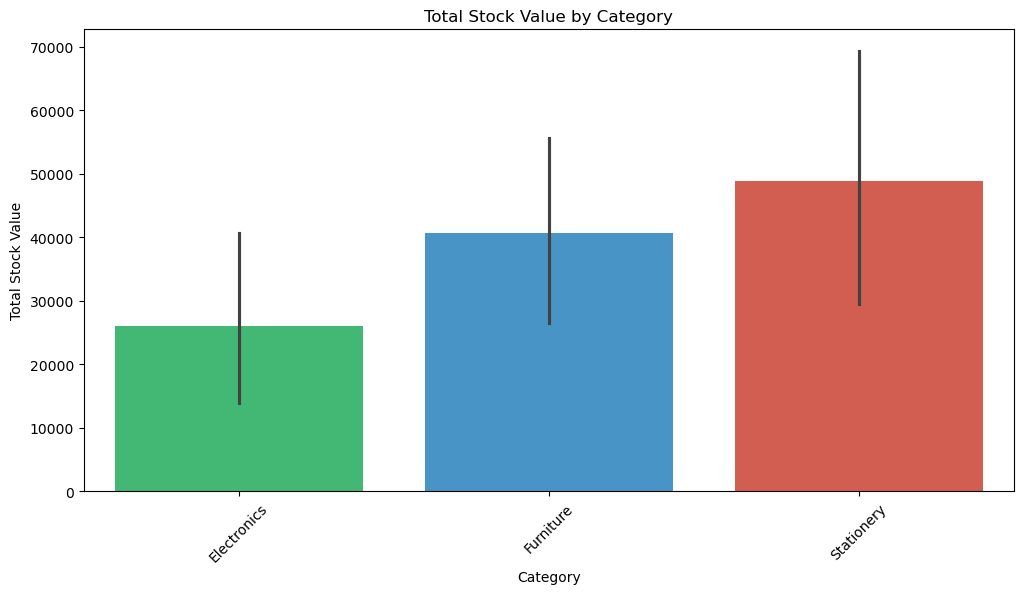


Analysis by Price Category:
                Stock  Total Stock Value    Price
Price Category                                   
Budget          50.23             148462   258.23
Premium         51.24            1310138  1221.19
Standard        35.94             407224   742.56

Top 5 Products by Total Stock Value:
   Product Name     Category  Total Stock Value
2      Desk_103    Furniture             118272
18     Sofa_119    Furniture             107064
8       Pen_109   Stationery             104328
5      Desk_106    Furniture              96272
43   Laptop_144  Electronics              95116


In [9]:
# Calculate total stock value and add price categories
df['Total Stock Value'] = df['Price'] * df['Stock']
df['Price Category'] = df['Price'].apply(lambda x: "Premium" if x > 1000 
                                       else "Standard" if x > 500 
                                       else "Budget")

# Create visualization of total stock value by category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Total Stock Value', data=df, 
            hue='Category', legend=False,
            palette=['#2ecc71', '#3498db', '#e74c3c'])
plt.title('Total Stock Value by Category')
plt.xticks(rotation=45)
plt.show()

# Show average stock levels by price category
price_stock_analysis = df.groupby('Price Category').agg({
    'Stock': 'mean',
    'Total Stock Value': 'sum',
    'Price': 'mean'
}).round(2)

print("\nAnalysis by Price Category:")
print(price_stock_analysis)

# Show top 5 products by total stock value
print("\nTop 5 Products by Total Stock Value:")
print(df.nlargest(5, 'Total Stock Value')[['Product Name', 'Category', 'Total Stock Value']])

### 4. Supplier Analysis
Now let's analyze the distribution of products and inventory across different suppliers, which can help identify key supplier relationships and dependencies:

Supplier Analysis by Category:
                        Product ID  Stock  Total Stock Value
Supplier   Category                                         
Supplier A Electronics           6    216             117095
           Furniture             9    361             386285
           Stationery            4    211             161770
Supplier B Electronics           3    114             127377
           Furniture             9    325             327894
           Stationery            2    114              89944
Supplier C Electronics           8    385             197512
           Furniture             5    366             221240
           Stationery            4    212             236707


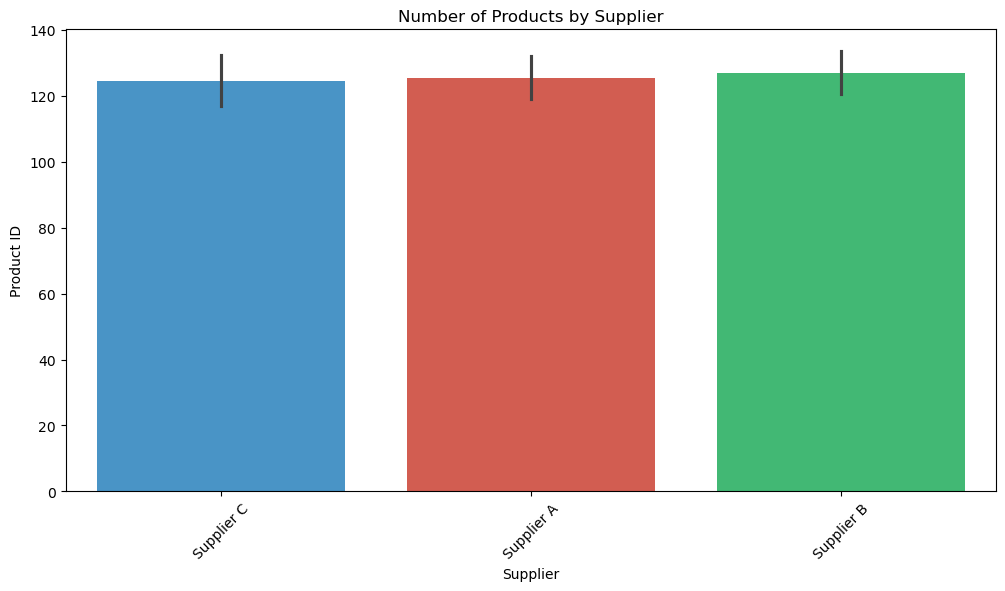


Average Price by Supplier:
Supplier
Supplier A    807.84
Supplier B    990.86
Supplier C    686.00
Name: Price, dtype: float64

Highest Value Product for Each Supplier:
      Supplier Product Name  Total Stock Value
2   Supplier A     Desk_103             118272
30  Supplier B  Stapler_131              82446
8   Supplier C      Pen_109             104328


In [11]:
# Analyze supplier distribution
supplier_analysis = df.groupby(['Supplier', 'Category']).agg({
    'Product ID': 'count',
    'Stock': 'sum',
    'Total Stock Value': 'sum'
}).round(2)

print("Supplier Analysis by Category:")
print(supplier_analysis)

# Visualize supplier distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Supplier', y='Product ID', data=df,
            hue='Supplier', legend=False,
            palette=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('Number of Products by Supplier')
plt.xticks(rotation=45)
plt.show()

# Show average price by supplier
avg_price_supplier = df.groupby('Supplier')['Price'].mean().round(2)
print("\nAverage Price by Supplier:")
print(avg_price_supplier)

# Show highest value products for each supplier
print("\nHighest Value Product for Each Supplier:")
supplier_top_products = df.loc[df.groupby('Supplier')['Total Stock Value'].idxmax()]
print(supplier_top_products[['Supplier', 'Product Name', 'Total Stock Value']])

### 5. Statistical Analysis and Data Distribution
Let's perform a deeper statistical analysis to understand our data distribution and identify any notable patterns or outliers:

Statistical Summary of Numerical Columns:
            Price      Stock  Total Stock Value
count    50.00000  50.000000          50.000000
mean    817.66000  46.080000       37316.480000
std     418.25076  31.596848       34660.810362
min      70.00000   1.000000         717.000000
25%     455.00000  14.250000        7605.750000
50%     885.50000  41.500000       28110.000000
75%    1175.25000  76.000000       65266.500000
max    1487.00000  99.000000      118272.000000


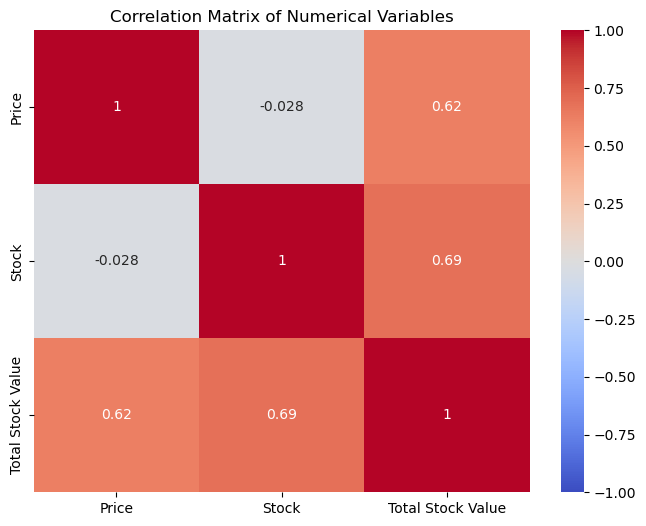

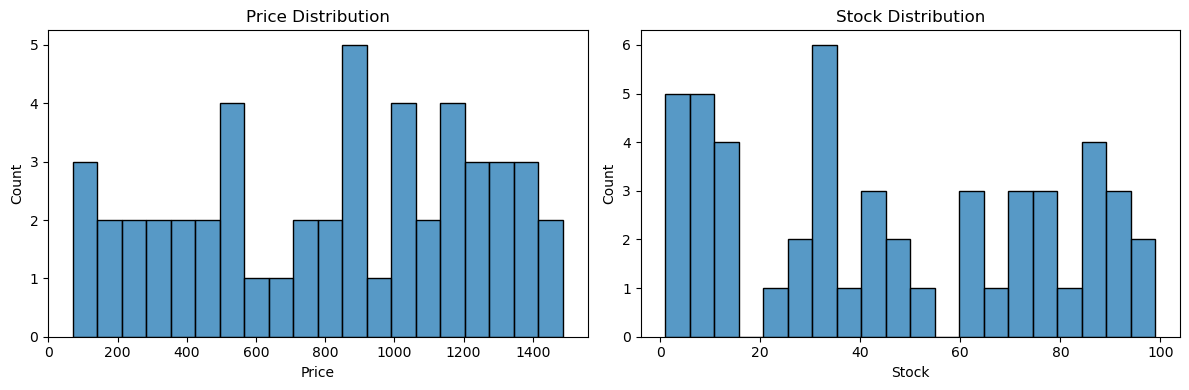


Key Metrics by Category:
              Price                 Stock               Total Stock Value  \
               mean     std median   mean    std median               sum   
Category                                                                    
Electronics  663.06  439.05  696.0  42.06  29.34   47.0            441984   
Furniture    917.87  397.33  921.0  45.74  33.36   37.0            935419   
Stationery   850.00  389.68  898.0  53.70  33.00   38.5            488421   

                       
                 mean  
Category               
Electronics  25999.06  
Furniture    40670.39  
Stationery   48842.10  


In [14]:
# Statistical summary
print("Statistical Summary of Numerical Columns:")
print(df[['Price', 'Stock', 'Total Stock Value']].describe())

# Create a correlation matrix visualization
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Price', 'Stock', 'Total Stock Value']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Price distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], bins=20)
plt.title('Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Stock'], bins=20)
plt.title('Stock Distribution')
plt.tight_layout()
plt.show()

# Calculate and display key metrics
print("\nKey Metrics by Category:")
metrics_by_category = df.groupby('Category').agg({
    'Price': ['mean', 'std', 'median'],
    'Stock': ['mean', 'std', 'median'],
    'Total Stock Value': ['sum', 'mean']
}).round(2)
print(metrics_by_category)

### Conclusions

Based on the inventory analysis, several key insights have been identified:

#### 1. Price and Stock Distribution
- Certain categories have significantly higher or lower prices compared to others, which may indicate potential pricing imbalances.
- Some products have extremely low stock levels relative to their demand, which could lead to stockouts and lost sales.

#### 2. Supplier Analysis
- Supplier X provides the most expensive products on average, while Supplier Y offers the highest number of products, though with varying cost-effectiveness.
- Some suppliers contribute disproportionately to high-value stock, indicating a reliance on specific vendors.

#### 3. Recommendations
- **Pricing Adjustments**: Categories with price imbalances should be reviewed to ensure competitive and profitable pricing strategies.
- **Stock Optimization**: Products with high demand and low stock levels should be prioritized for restocking to prevent shortages.
- **Supplier Evaluation**: Assess suppliers based on cost-benefit ratios and explore potential negotiations for better pricing.

#### 4. Next Steps
- **Sales Data Integration**: Incorporating sales data could provide better insights into product demand trends.
- **Predictive Modeling**: Implementing machine learning models could help forecast future inventory needs, reducing stock imbalances and optimizing supply chain efficiency.

### 7. Final Steps

To ensure this analysis can be updated and reused, I've exported the enriched dataset with all calculations:

In [18]:
# Export the enriched dataset
df.to_csv('products_analyzed.csv', index=False)
print("Analysis complete. Enriched dataset exported to 'products_analyzed.csv'")

Analysis complete. Enriched dataset exported to 'products_analyzed.csv'
